<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

## Setting

### Setting ( Import, From, Greed )

In [137]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Setting')
from setting_import import *
from setting_from import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting ( CSV Load )

In [2]:
sys.path.append('/content/drive/MyDrive/py model')

## def Set

* '/content/drive/MyDrive/py model/titanyc/train.csv'

### DrawReag( Data )

In [164]:
def DrawReag(model, X, y, 
                            X_test=[], y_test=[], 
                            features=[], labels=[]): # 결정경계

    colors = ('orangered', 'dodgerblue', 'limegreen', 'fuchsia', 'blueviolet')
    cmap = ListedColormap(colors[:len(np.unique( y))])

    x0mn, x0mx = X[:,0].min() -1, X[:,0].max() +1
    x1mn, x1mx = X[:,1].min() -1, X[:,1].max() +1
    x0 = np.arange(x0mn, x0mx, 0.02)
    x1 = np.arange(x1mn, x1mx, 0.02)
    print('* arange', x0.shape, x1.shape)
    X0, X1 = np.meshgrid(x0, x1)
    print('* meshgrid', x0.shape, x1.shape)
    x0, x1 = X0.ravel(), X1.ravel()
    print('* ravel', x0.shape, x1.shape)
    x_every = np.array([x0, x1]).T
    print('* every', x_every.shape)
    y_pred = model.predict(x_every)
    print('* y_pred', y_pred.shape)
    Y_pred = y_pred.reshape(X0.shape)
    print('* y_pred', y_pred.shape)

    if not len(labels): labels=[i for i in range(len(np.unique(y)))]
    plt.contourf(X0, X1, Y_pred, alpha=0.4, cmap=cmap )
    for idx, c in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c, 0], 
                    y = X[y == c, 1],
                    alpha=0.8,
                    c=colors[idx],
                    label=labels[idx],
                    marker='x',
                    linewidth=2)
    if len(X_test):
        for idx, c in enumerate(np.unique(y_test)):
            plt.scatter(x = X_test[y_test == c, 0], 
                        y = X_test[y_test == c, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker='o',
                        edgecolor='k',
                        linewidth=2)
    
    if features:
        plt.xlabel(features[0])
        plt.ylabel(features[1])
    plt.legend()

### DataLoad( CSV )

In [195]:
def DataLoad(CSV):

    # Titanic 데이터셋 불러오기
    Dataset = pd.read_csv(CSV)
    return Dataset

### DataSet ( DataLoad ) 

In [232]:
def DataSet(Titanic):

    # Nan값 삭제 Axis=0
    Titanic = Titanic.dropna(axis=0)

    # 가족 수, 동반자 또는 연인 수 합치기
    Pair, Family = Titanic.loc[:, 'SibSp' ].values, Titanic.loc[:, 'Parch' ].values
    for P_F in range(len(Titanic)):
        Pair[P_F] += Family[P_F]

    # 탑승 구역 인트로 변환
    InTitnyc = Titanic.loc[:, 'Embarked' ].values
    InTitnyc[InTitnyc == 'Q' ] = 0.0
    InTitnyc[InTitnyc == 'C' ] = 1.0
    InTitnyc[InTitnyc == 'S' ] = 2.0

    SexTitnyc = Titanic.loc[:, 'Sex' ].values
    SexTitnyc[SexTitnyc == 'female' ] = 0.0
    SexTitnyc[SexTitnyc == 'male' ] = 1.0
    

    # 필요 없는 칼럼 버리기 Axis=1
    for DropColumns in ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch']:
        Titanic = Titanic.drop(DropColumns, axis=1)

    # # Death 버리기
    # DeathMask = Titanic['Survived'] == 0
    # Titanic[DeathMask] = float('NaN')

    # Nan값 삭제 Axis=0
    Titanic = Titanic.dropna(axis=0)

    # Index 재 정렬
    Titanic.index = np.arange(1, (len(Titanic)+1))

    # 소수 버리기
    for CoIDX in ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Embarked']:
        for IDX in range(len(Titanic)):
            Titanic.loc[IDX+1, CoIDX] = int(Titanic.loc[IDX+1, CoIDX])

    # 칼럼 명 변경
    Titanic.columns = ['Alive', 'Class', 'Sex', 'Age', 'Pair', 'Ticket', 'Check_In']

    # 출력
    return Titanic

### DataFit( DataSet )

In [233]:
DS = DataLoad('/content/drive/MyDrive/py model/titanyc/train.csv')

DataSet(DS)

,Alive,Class,Sex,Age,Pair,Ticket,Check_In
1,1,1,0.0,38.0,1,71.0,1
2,1,1,0.0,35.0,1,53.0,2
3,0,1,1.0,54.0,0,51.0,2
4,1,3,0.0,4.0,2,16.0,2
5,1,1,0.0,58.0,0,26.0,2
...,...,...,...,...,...,...,...
179,1,1,0.0,47.0,2,52.0,2
180,0,1,1.0,33.0,0,5.0,2
181,1,1,0.0,56.0,1,83.0,1
182,1,1,0.0,19.0,0,30.0,2


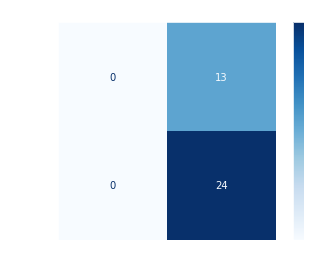

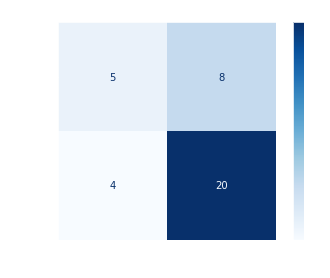

In [235]:
DS = DataLoad('/content/drive/MyDrive/py model/titanyc/train.csv')

df = DataSet(DS)

X = df.loc[:, 'Age':'Pair' ].values
y = df.loc[:,'Alive'].values
labels = ['Death', 'Alive']
y = np.array(y, dtype='int') # 인트로 변환

X_train, X_test, y_train, y_test = train_test_split(X, y,               # Train, Test로 분할, 쉐이프 확인
                                                    test_size=0.2,                      # Train, Test로 분할, 쉐이프 확인
                                                    random_state=1)                # Train, Test로 분할, 쉐이프 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape        # Train, Test로 분할, 쉐이프 확인

def draw_cm(model, X, y, labels, title=''): # 함수 지정
    y_pred = model.predict(X) # 학습?
    cm = confusion_matrix(y, y_pred) # 혼돈 행렬
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues') # 그림그리기
    if title: plt.title(title) # 타이틀 = 타이틀

model = DecisionTreeClassifier(criterion='gini', # gini로 최적화
                                                  max_depth=5
                                                  )
model.fit(X_train[:,:2], y_train) # 학습 1트

model = SVC(kernel='linear', random_state=1) # SVC로 최적화
model.fit(X_train, y_train) # 학습


acc = model.score(X_test[:,:2], y_test) # 성공 계산
draw_cm(model, X_test[:,:2], y_test, labels, title=f'Acc:{np.round(acc,2)}') # 성공 출력
plt.show() # 출력

model = DecisionTreeClassifier(criterion='gini', # gini로 최적화
                                                  max_depth=5
                                                  )
model.fit(X_train[:,:2], y_train) # 학습 2트

acc = model.score(X_test[:,:2], y_test) # 성공 계산
draw_cm(model, X_test[:,:2], y_test, labels, title=f'Acc:{np.round(acc,2)}') # 성공 출력
plt.show() # 출력

# plt.figure(figsize=(12,8)) # 12대8로 출력판
# plot_tree(model) # 트리그래프
# plt.show() # 출력

# DrawReag(model, X_train[:,:2], y_train, # 추울력(점유맵)
#                                     X_test[:,:2], y_test,
#                                     features=['Age','Pair'],
#                                     labels=labels
#                                     )
# plt.show() # 출력

In [ ]:
def draw(loaderint=3, loaderstr='sepal', chaosstr='gini', maxdepth=3, TRE=True, DEC=True, ACC=True):

    X_train, X_test, y_train, y_test, columns, labels = iris_loader(loaderint, loaderstr) 
    
    model = DecisionTreeClassifier(criterion=chaosstr, 
                                max_depth=maxdepth)
    model.fit(X_train, y_train)

    if ACC:
        acc = model.score(X_test, y_test)
        draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
        plt.show()

    if DEC:
        draw_decision_region(model, X_train, y_train,
                    X_test, y_test,
                    features=columns,
                    labels=labels)
        plt.show()

    if TRE:
        plt.figure(figsize=(12,8))
        plot_tree(model)
        plt.show()